# Create a direction compass for each player during the play
- This should allow us to see the direction and velocity that they were moving through the play.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cmath

pd.set_option('display.max_columns', 50)

%matplotlib inline

## Read Data

In [42]:
play = pd.read_csv('../working/playlevel/during_play/2016-5-3129.csv')
vr = pd.read_csv('../input/video_review.csv')

In [3]:
if not play.left_to_right.any():
    print('not left to right')
playavgs = play.groupby('role')['o','dir','mph','dis'].agg({'mean','std'})
playavgs.columns = ['_'.join(col).strip() for col in playavgs.columns.values]
playavgs['season_year'] = play[['season_year','gamekey','playid']].values[0][0]
playavgs['gamekey'] = play[['season_year','gamekey','playid']].values[0][1]
playavgs['playid'] = play[['season_year','gamekey','playid']].values[0][2]

not left to right


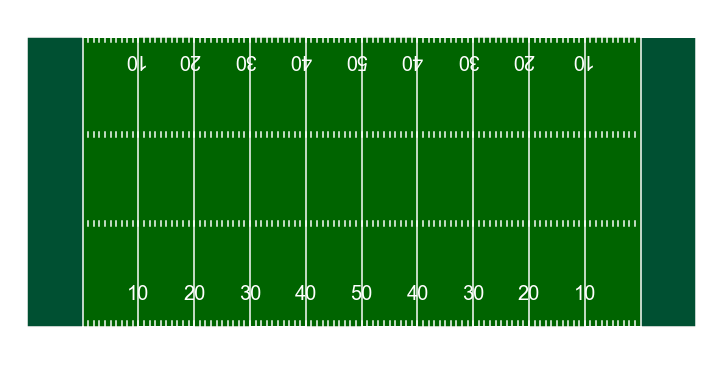

In [21]:
def create_football_field():
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1, edgecolor='r', facecolor='darkgreen', zorder=0)
    fig, ax = plt.subplots(1, figsize=(12.0, 6.33))
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    # Endzones
    ez1 = patches.Rectangle((0, 0), 10, 53.3,
                            linewidth=0.1, edgecolor='r', facecolor='blue', alpha=0.2, zorder=0)
    ez2 = patches.Rectangle((110, 0), 120, 53.3,
                            linewidth=0.1, edgecolor='r', facecolor='blue', alpha=0.2, zorder=0)
    ax.add_patch(ez1)
    ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    for x in range(20, 110, 10):
        numb = x
        if x > 50:
            numb = 120 - x
        plt.text(x, 5, str(numb - 10), horizontalalignment='center', fontsize=20, fontname='Arial', color='white')
        plt.text(x - 0.95, 53.3 - 5, str(numb - 10), horizontalalignment='center',
                 fontsize=20, fontname='Arial', color='white', rotation=180)

    for x in range(11, 110):
        plt.plot([x, x], [0, 1], color='white')
        plt.plot([x, x], [53.3, 52.3], color='white')
        plt.plot([x, x], [18.5, 19.5], color='white')
        plt.plot([x, x], [34.8, 35.8], color='white')
    return fig, ax

fig, ax = create_football_field()
plt.show()

# Plotting Functions

In [13]:
def cart2pol(x, y):
    """Convert from Cartesian to polar coordinates.

    Example
    -------
    >>> theta, radius = pol2cart(x, y)
    """
    radius = np.hypot(x, y)
    theta = np.arctan2(y, x)
    return theta, radius

def compass(angles, radii, arrowprops=None):
    """
    Compass draws a graph that displays the vectors with
    components `u` and `v` as arrows from the origin.

    Examples
    --------
    >>> import numpy as np
    >>> u = [+0, +0.5, -0.50, -0.90]
    >>> v = [+1, +0.5, -0.45, +0.85]
    >>> compass(u, v)
    """

    #angles, radii = cart2pol(u, v)
    
    fig, ax = plt.subplots(subplot_kw=dict(polar=True))

    kw = dict(arrowstyle="->", color='k')
    if arrowprops:
        kw.update(arrowprops)
    [ax.annotate("", xy=(angle, radius), xytext=(0, 0),
                 arrowprops=kw) for
     angle, radius in zip(angles, radii)]

    ax.set_ylim(0, np.max(radii))

    return fig, ax

# Plot the data

In [14]:
play['dir_theta'] = play['dir'] * np.pi / 180

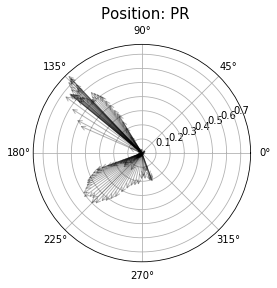

In [15]:
d = play.loc[play['role'] == 'PR']
compass(d['dir_theta'], d['dis'], arrowprops={'alpha':0.3})
plt.suptitle('Position: PR', x=0.52, y=1.01, fontsize=15)
plt.show()

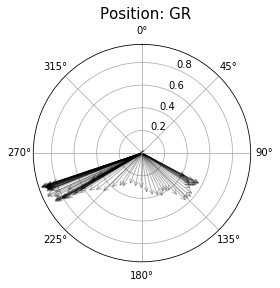

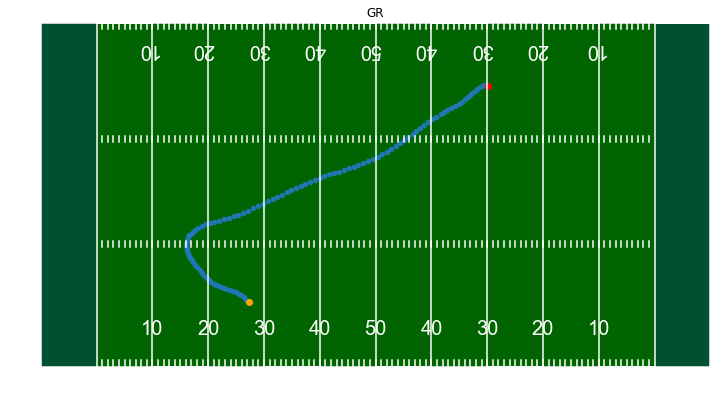

In [22]:
# Plot angle
role = 'GR'
d = play.loc[play['role'] == role]
fig, ax1 = compass(d['dir_theta'], d['dis'], arrowprops={'alpha':0.3})
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
plt.suptitle('Position: {}'.format(role), x=0.52, y=1.01, fontsize=15)
plt.show()

# Plot path
fig, ax2 = create_football_field()
d.plot('x', 'y', kind='scatter', xlim = (0, 120), ylim=(0,53.3), title=role, ax=ax2)
start_pos = d.loc[d['time'] == d['time'].min()]
ax2.scatter(start_pos['x'], start_pos['y'], color='red')
end_pos = d.loc[d['time'] == d['time'].max()]
ax2.scatter(end_pos['x'], end_pos['y'], color='orange')
plt.show()

# All players for a play plot

injured player is PLW
primary partner player is PR


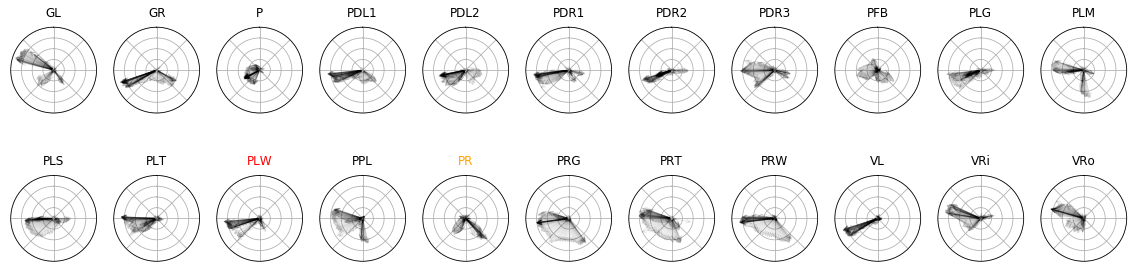

In [8]:
f, axarr = plt.subplots(2, 11, subplot_kw=dict(polar=True), figsize=(20, 5))
arrowprops={'alpha':0.1}
kw = dict(arrowstyle="->", color='k')
if arrowprops:
    kw.update(arrowprops)
n = 0
row = 0
for i, d in play.groupby('role'):
    angles = d['dir_theta']
    radii = d['dis']
    color = 'black'
    if d['injured_player'].values[0]:
        print('injured player is {}'.format(d.role.values[0]))
        color = 'red'
    if d['primary_partner_player'].values[0]:
        print('primary partner player is {}'.format(d.role.values[0]))
        color = 'orange'
    [axarr[row, n].annotate("", xy=(angle, radius), xytext=(0, 0),
                 arrowprops=kw, color=color) for angle, radius in zip(angles, radii)]
    # axarr[row, n].annotate("", xy=(d['dir'].mean(), d['dis'].mean()), xytext=(0, 0), arrowprops={'color': 'red'}) # Red is the straight angular mean
    # rmean, phimean = cmath.polar(d.apply(lambda col: cmath.rect(col['dis'], col['dir_theta']), axis=1).mean())
    # axarr[row, n].annotate("", xy=(rmean, phimean), xytext=(0, 0), arrowprops={'color': 'blue'}) # Make rectangular - take mean then convert to polar
    # axarr[n, col].annotate("", xy=(stats.circmean(d['dir'], high=360), d['dis'].mean()), xytext=(0, 0), arrowprops={'color': 'orange'}) #use cir mean
    axarr[row, n].set_title(i, color=color)
    axarr[row, n].set_theta_zero_location("N")
    axarr[row, n].set_theta_direction(-1)
    axarr[row, n].set_xticklabels([''])
    axarr[row, n].set_yticklabels([''])
    n += 1
    if n == 11:
        n = 0
        row = 1
#plt.tight_layout()

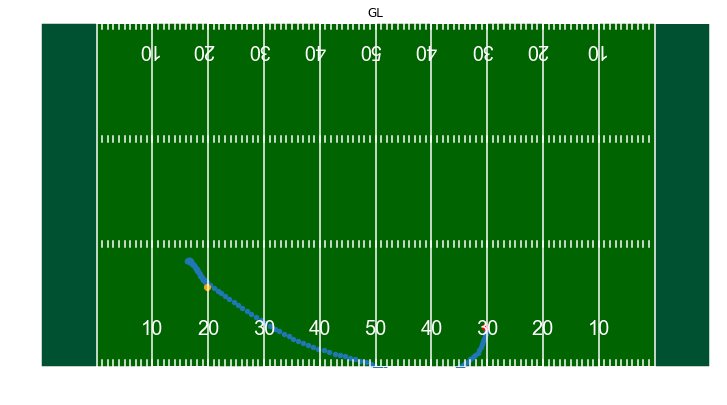

In [24]:
grouped = play.groupby('role')

for i, d in grouped:
    fig, ax = create_football_field()
    d.plot('x', 'y', kind='scatter', xlim = (0, 120), ylim=(0,53.3), title=i, ax=ax)
    start_pos = d.loc[d['time'] == d['time'].min()]
    ax.scatter(start_pos['x'], start_pos['y'], color='red')
    end_pos = d.loc[d['time'] == d['time'].max()]
    ax.scatter(end_pos['x'], end_pos['y'], color='orange')
    plt.show()
    break

# Find the point when injured player is closest to primary partner (time of injury?)

In [25]:
injured = play.loc[play['injured_player']]
primarypartner = play.loc[play['primary_partner_player']]

inj_and_pp = pd.merge(injured[['time','x','y']], primarypartner[['time','x','y']], on='time', suffixes=('_inj','_pp'))
inj_and_pp['dis_from_eachother'] = np.sqrt(np.square(inj_and_pp['x_inj'] - inj_and_pp['x_pp']) + np.square(inj_and_pp['y_inj'] - inj_and_pp['y_pp']))

injury_time = inj_and_pp.sort_values('dis_from_eachother')['time'].values[0]

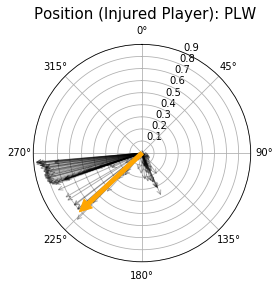

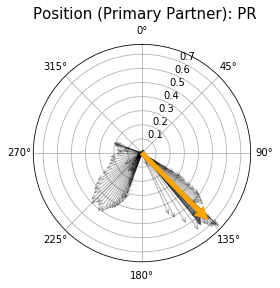

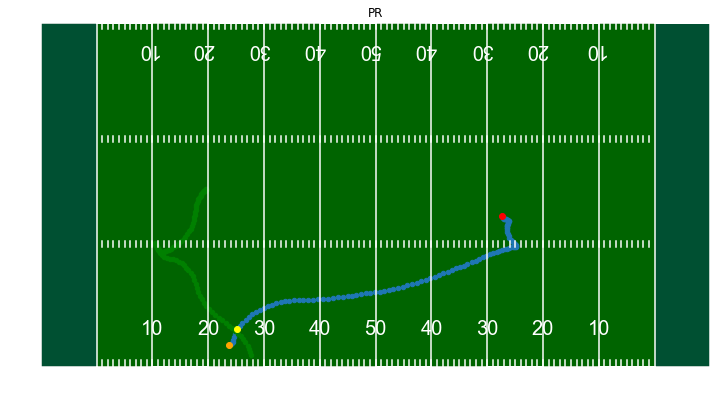

In [27]:
# Plot angle

# Plot injured player compass
d = play.loc[play['injured_player']]
role = d.role.values[0]
fig, ax1 = compass(d['dir_theta'], d['dis'], arrowprops={'alpha':0.3})
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
# Color point of time when inujury happened
theta_at_inj = d.loc[d['time'] == injury_time]['dir_theta'].values[0]
dis_at_inj = d.loc[d['time'] == injury_time]['dis'].values[0]
ax1.annotate("", xy=(theta_at_inj,dis_at_inj), xytext=(0, 0), arrowprops={'color': 'orange'}) #use cir mean
plt.suptitle('Position (Injured Player): {}'.format(role), x=0.52, y=1.01, fontsize=15)
plt.show()

# Plot primary partner compass
d = play.loc[play['primary_partner_player']]
role = d.role.values[0]
fig, ax1 = compass(d['dir_theta'], d['dis'], arrowprops={'alpha':0.3})
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
# Color point of time when inujury happened
theta_at_inj = d.loc[d['time'] == injury_time]['dir_theta'].values[0]
dis_at_inj = d.loc[d['time'] == injury_time]['dis'].values[0]
ax1.annotate("", xy=(theta_at_inj,dis_at_inj), xytext=(0, 0), arrowprops={'color': 'orange'}) #use cir mean
plt.suptitle('Position (Primary Partner): {}'.format(role), x=0.52, y=1.01, fontsize=15)
plt.show()

# Plot path
d = play.loc[play['injured_player']]
fig, ax2 = create_football_field()
d.plot('x', 'y', kind='scatter', xlim = (0, 120), ylim=(0,53.3), title=role, ax=ax2)
start_pos = d.loc[d['time'] == d['time'].min()]
ax2.scatter(start_pos['x'], start_pos['y'], color='red')
end_pos = d.loc[d['time'] == d['time'].max()]
ax2.scatter(end_pos['x'], end_pos['y'], color='orange')
inj_pos = d.loc[d['time'] == injury_time]
#ax2.scatter(inj_pos['x'], inj_pos['y'], color='yellow')

play.loc[play['primary_partner_player']].plot('x', 'y', kind='scatter', xlim = (0, 120), ylim=(0,53.3), title=role, ax=ax2, color='green')
ax2.scatter(inj_pos['x'], inj_pos['y'], color='yellow')


plt.show()

# Try on different play

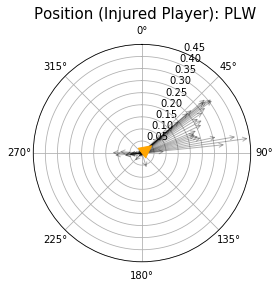

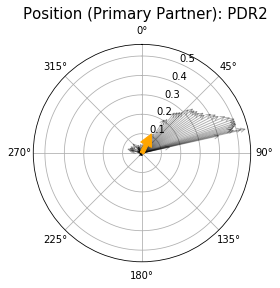

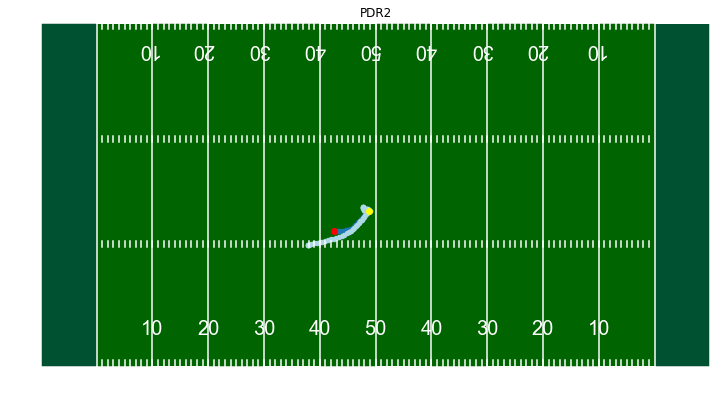

In [32]:
play = pd.read_csv('../working/playlevel/during_play/2017-607-978.csv')
play['dir_theta'] = play['dir'] * np.pi / 180

# Determine time of injury
injured = play.loc[play['injured_player']]
primarypartner = play.loc[play['primary_partner_player']]

inj_and_pp = pd.merge(injured[['time','x','y']], primarypartner[['time','x','y']], on='time', suffixes=('_inj','_pp'))
inj_and_pp['dis_from_eachother'] = np.sqrt(np.square(inj_and_pp['x_inj'] - inj_and_pp['x_pp']) + np.square(inj_and_pp['y_inj'] - inj_and_pp['y_pp']))

injury_time = inj_and_pp.sort_values('dis_from_eachother')['time'].values[0]

# Plot injured player compass
d = play.loc[play['injured_player']]
role = d.role.values[0]
fig, ax1 = compass(d['dir_theta'], d['dis'], arrowprops={'alpha':0.3})
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
# Color point of time when inujury happened
theta_at_inj = d.loc[d['time'] == injury_time]['dir_theta'].values[0]
dis_at_inj = d.loc[d['time'] == injury_time]['dis'].values[0]
ax1.annotate("", xy=(theta_at_inj,dis_at_inj), xytext=(0, 0), arrowprops={'color': 'orange'}) #use cir mean
plt.suptitle('Position (Injured Player): {}'.format(role), x=0.52, y=1.01, fontsize=15)
plt.show()

# Plot primary partner compass
d = play.loc[play['primary_partner_player']]
role = d.role.values[0]
fig, ax1 = compass(d['dir_theta'], d['dis'], arrowprops={'alpha':0.3})
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
# Color point of time when inujury happened
theta_at_inj = d.loc[d['time'] == injury_time]['dir_theta'].values[0]
dis_at_inj = d.loc[d['time'] == injury_time]['dis'].values[0]
ax1.annotate("", xy=(theta_at_inj,dis_at_inj), xytext=(0, 0), arrowprops={'color': 'orange'}) #use cir mean
plt.suptitle('Position (Primary Partner): {}'.format(role), x=0.52, y=1.01, fontsize=15)
plt.show()

# Plot path
d = play.loc[play['injured_player']]
fig, ax2 = create_football_field()
d.plot('x', 'y', kind='scatter', xlim = (0, 120), ylim=(0,53.3), title=role, ax=ax2)
start_pos = d.loc[d['time'] == d['time'].min()]
ax2.scatter(start_pos['x'], start_pos['y'], color='red')
end_pos = d.loc[d['time'] == d['time'].max()]
ax2.scatter(end_pos['x'], end_pos['y'], color='orange')
inj_pos = d.loc[d['time'] == injury_time]
#ax2.scatter(inj_pos['x'], inj_pos['y'], color='yellow')

play.loc[play['primary_partner_player']].plot('x', 'y', kind='scatter', xlim = (0, 120), ylim=(0,53.3), title=role, ax=ax2, color='lightblue')
ax2.scatter(inj_pos['x'], inj_pos['y'], color='yellow')

plt.show()

# Loop through all injury plays

In [15]:
vr = pd.read_csv('../input/video_review.csv')

In [16]:
vr.head()

Season_Year  GameKey  PlayID  GSISID Player_Activity_Derived  \
0         2016        5    3129   31057                Tackling   
1         2016       21    2587   29343                 Blocked   
2         2016       29     538   31023                Tackling   
3         2016       45    1212   33121                Tackling   
4         2016       54    1045   32444                 Blocked   

  Turnover_Related Primary_Impact_Type Primary_Partner_GSISID  \
0               No      Helmet-to-body                  32482   
1               No    Helmet-to-helmet                  31059   
2               No      Helmet-to-body                  31941   
3               No      Helmet-to-body                  28249   
4               No      Helmet-to-body                  31756   

  Primary_Partner_Activity_Derived Friendly_Fire  
0                          Tackled            No  
1                         Blocking            No  
2                          Tackled            No  
3                          Tackled            No  
4                          Blocked           Yes

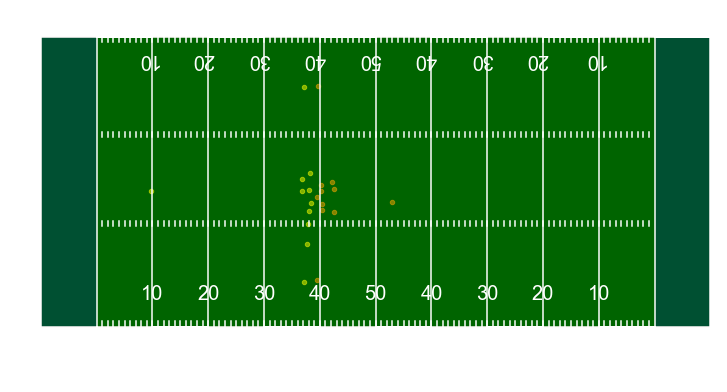

In [40]:
fig, ax = create_football_field()
play.loc[(play['punting_returning_team'] == 'Returning_Team') & (play['event'] == 'ball_snap')].plot('x', 'y', alpha=0.5, kind='scatter', color='yellow', ax=ax, zorder=2)
play.loc[(play['punting_returning_team'] == 'Punting_Team')  & (play['event'] == 'ball_snap')].plot('x', 'y', alpha=0.5, kind='scatter', color='orange', ax=ax, zorder=2)

plt.show()

Season 2016 - Gamekey 5 - Playid 3129


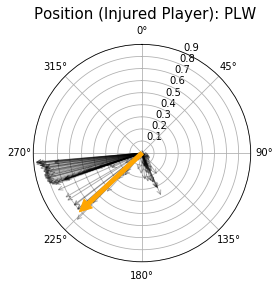

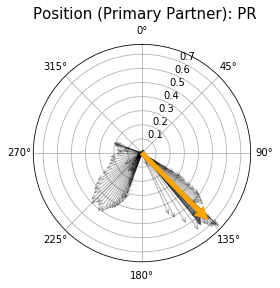

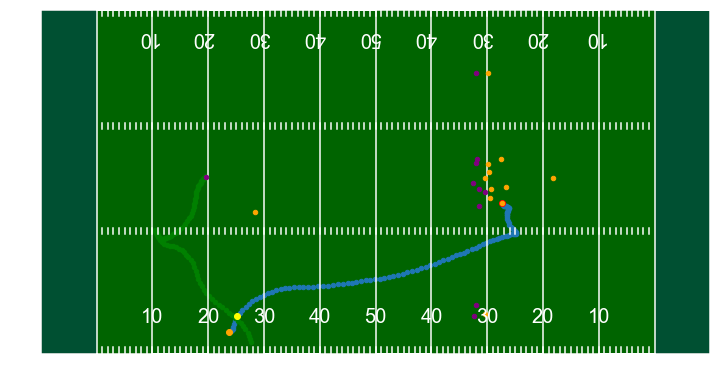

Season 2016 - Gamekey 21 - Playid 2587


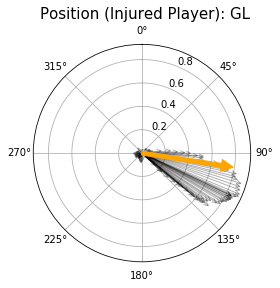

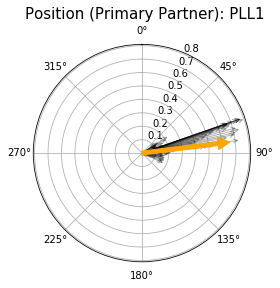

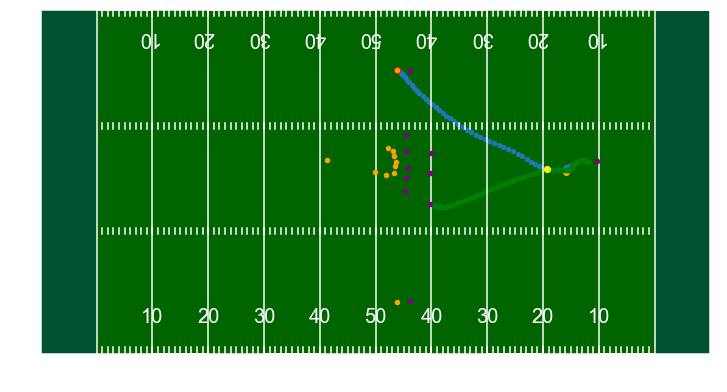

Season 2016 - Gamekey 29 - Playid 538


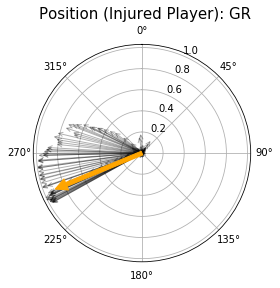

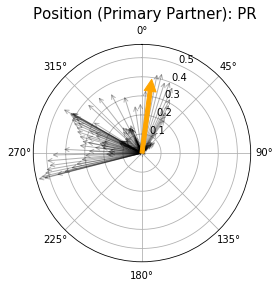

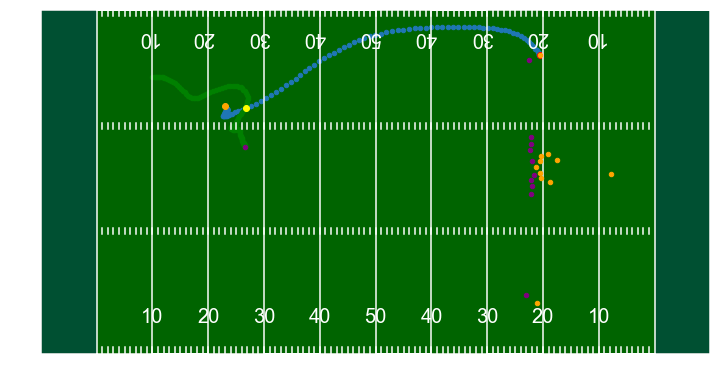

Season 2016 - Gamekey 45 - Playid 1212


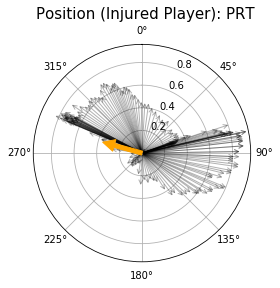

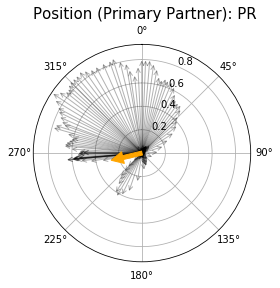

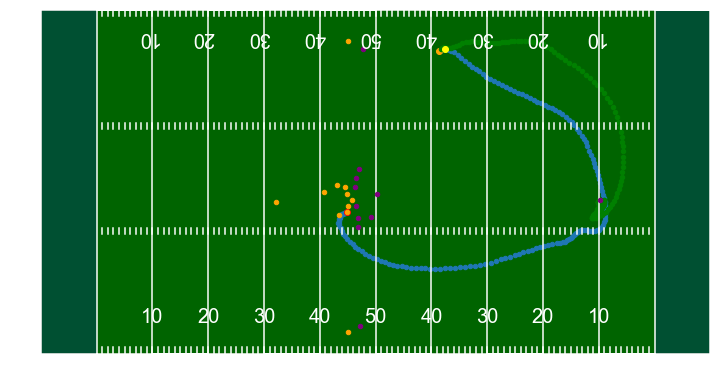

Season 2016 - Gamekey 54 - Playid 1045


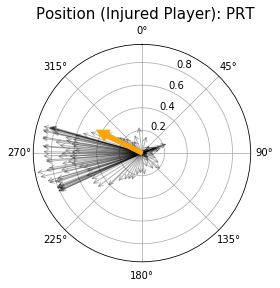

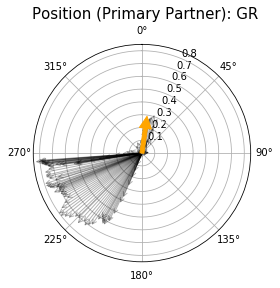

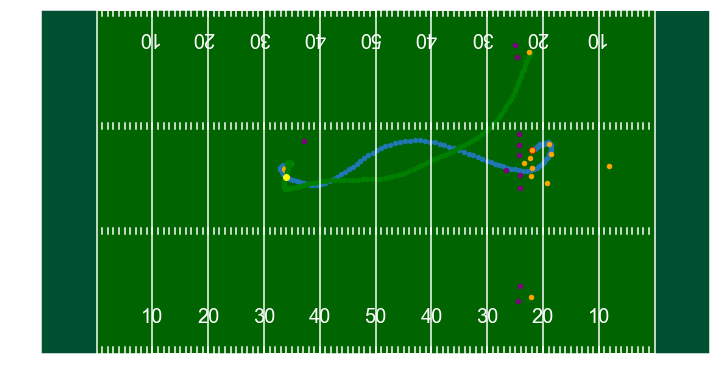

Season 2016 - Gamekey 60 - Playid 905


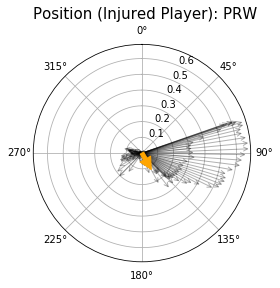

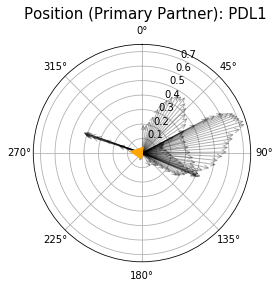

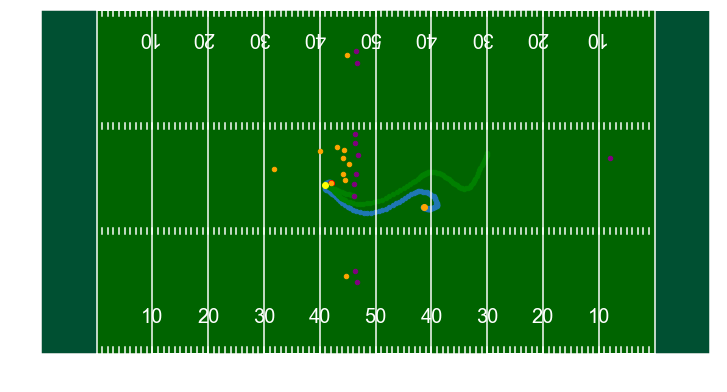

Season 2016 - Gamekey 144 - Playid 2342


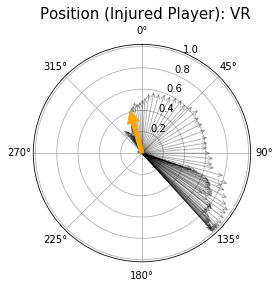

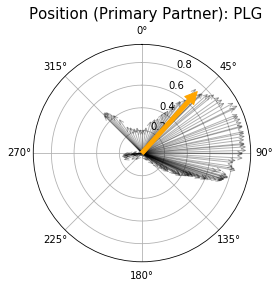

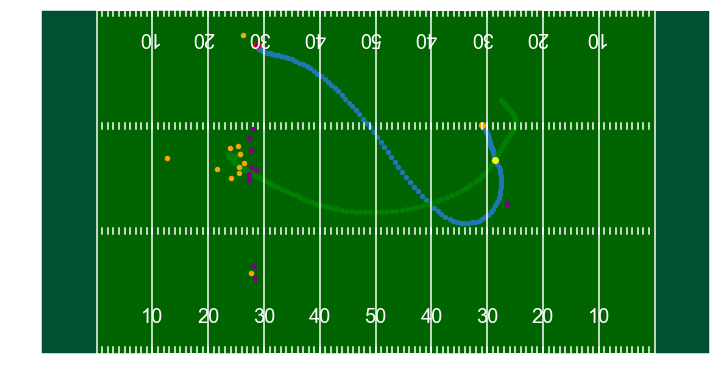

Season 2016 - Gamekey 149 - Playid 3663


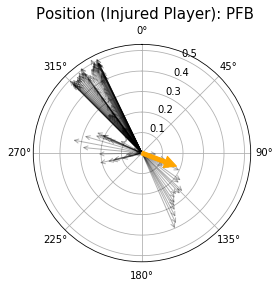

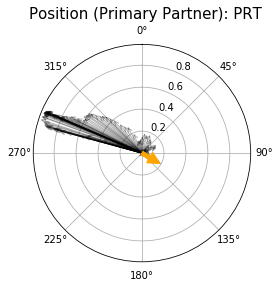

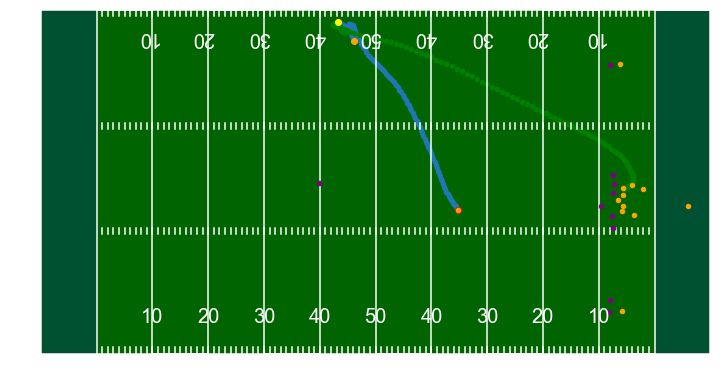

Season 2016 - Gamekey 189 - Playid 3509


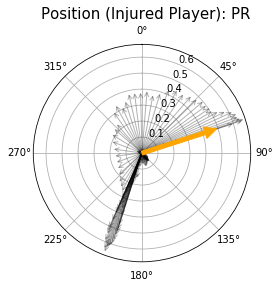

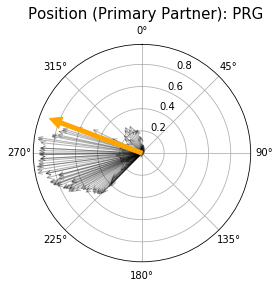

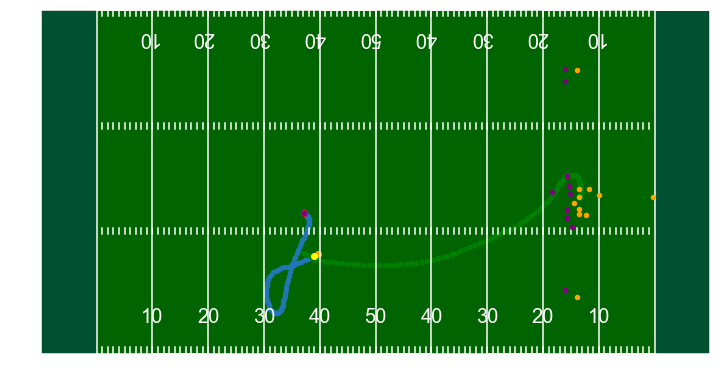

Season 2016 - Gamekey 218 - Playid 3468


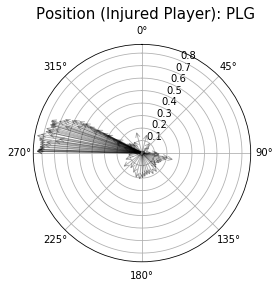

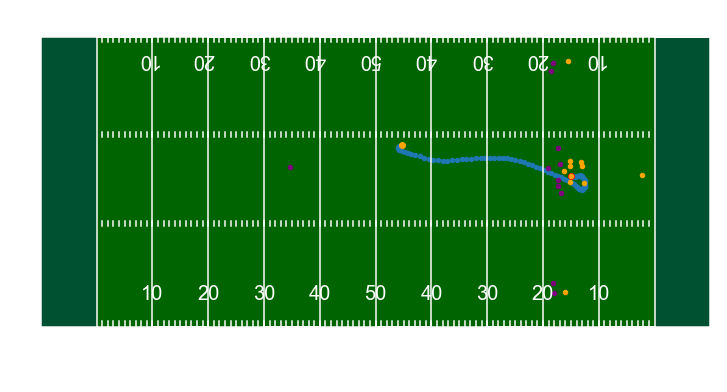

Season 2016 - Gamekey 231 - Playid 1976


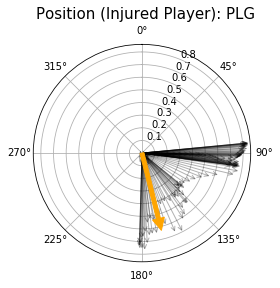

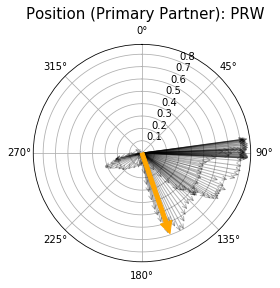

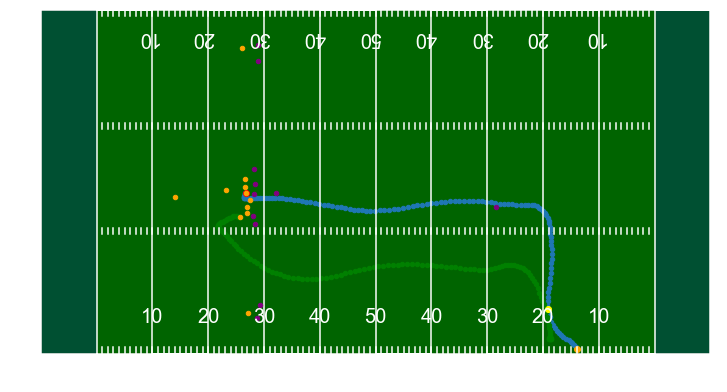

Season 2016 - Gamekey 234 - Playid 3278


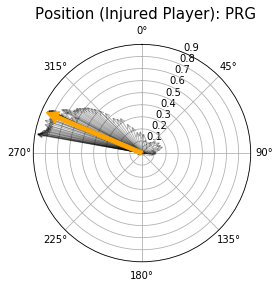

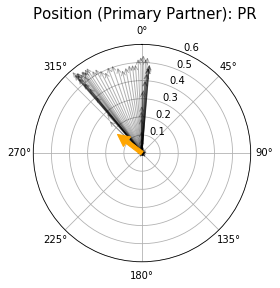

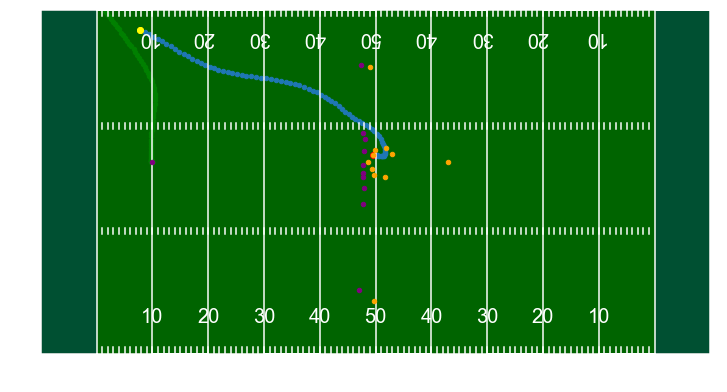

Season 2016 - Gamekey 266 - Playid 2902


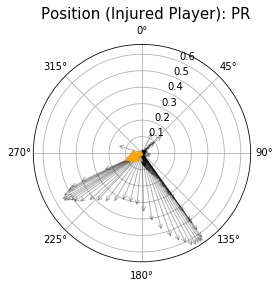

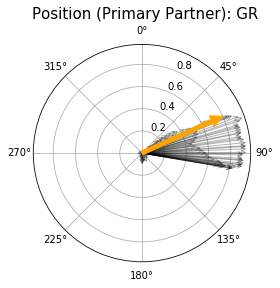

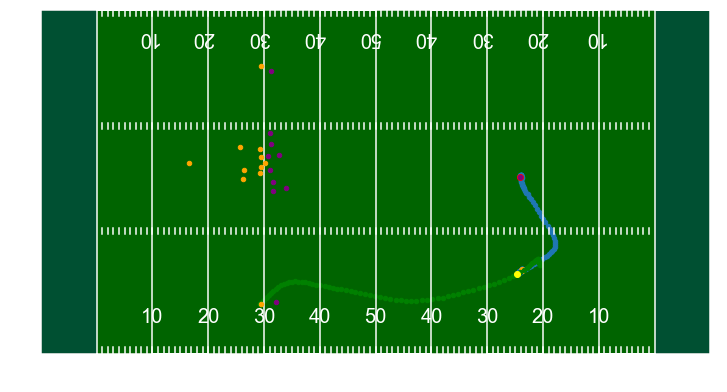

Season 2016 - Gamekey 274 - Playid 3609


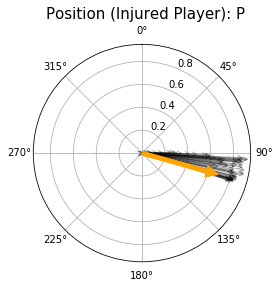

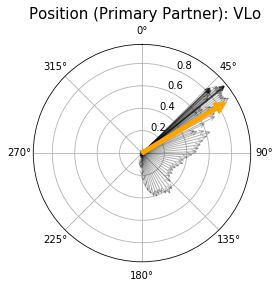

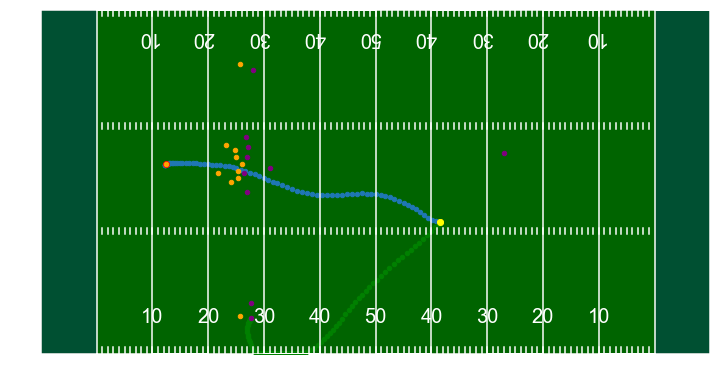

Season 2016 - Gamekey 280 - Playid 2918


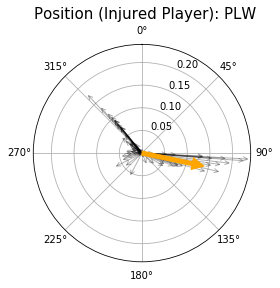

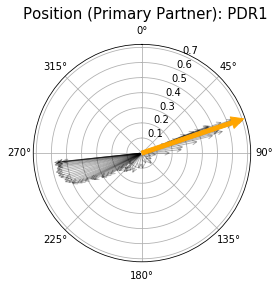

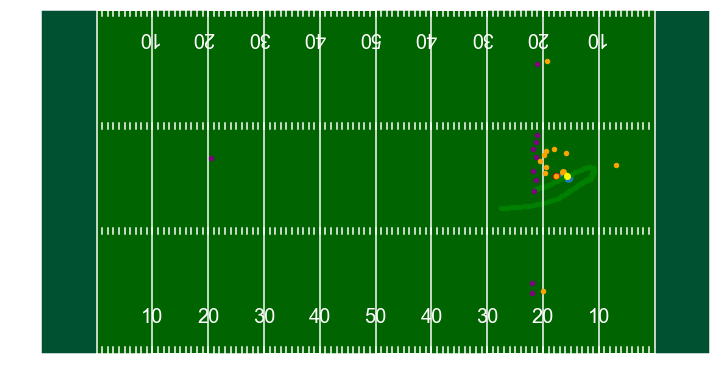

Season 2016 - Gamekey 280 - Playid 3746


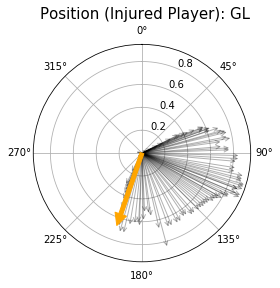

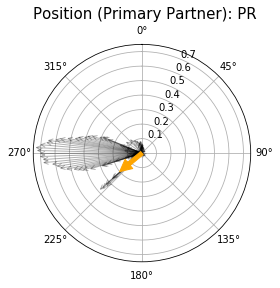

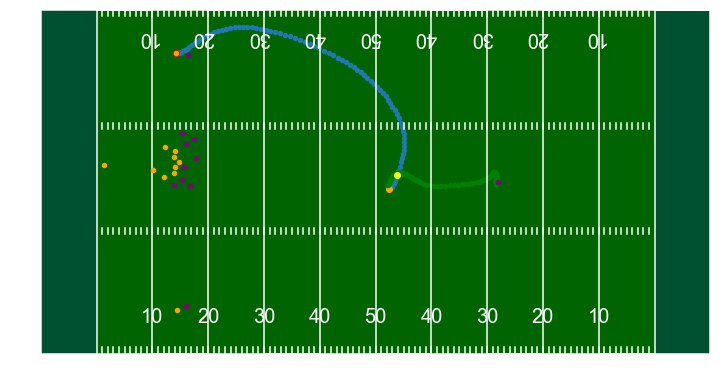

Season 2016 - Gamekey 281 - Playid 1526


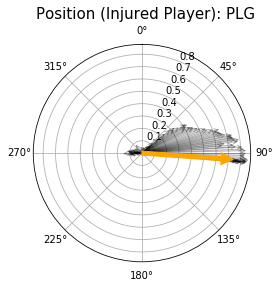

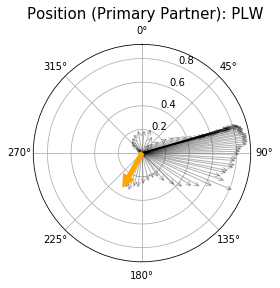

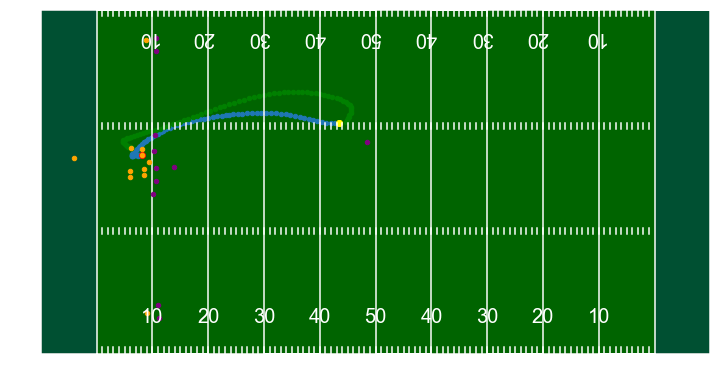

Season 2016 - Gamekey 289 - Playid 2341


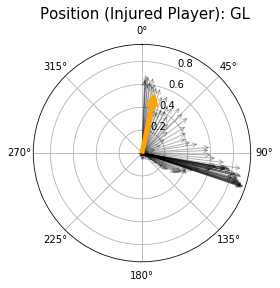

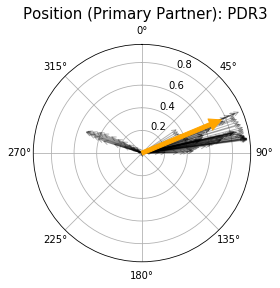

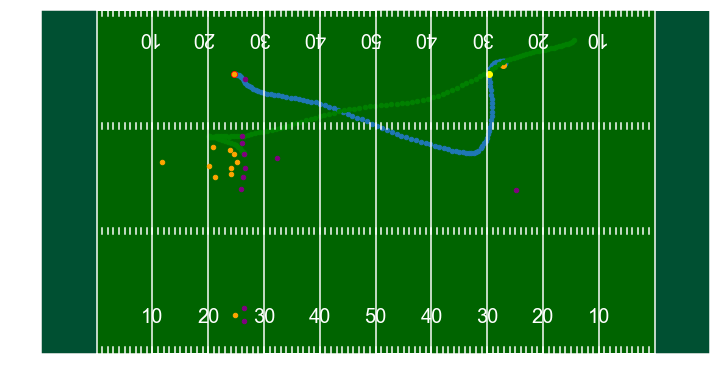

Season 2016 - Gamekey 296 - Playid 2667


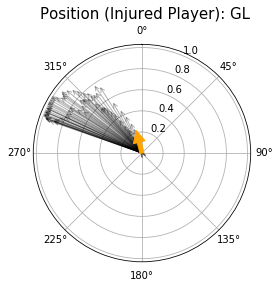

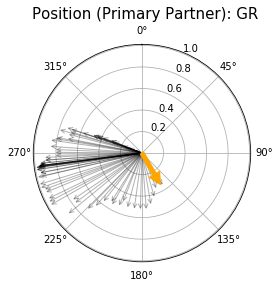

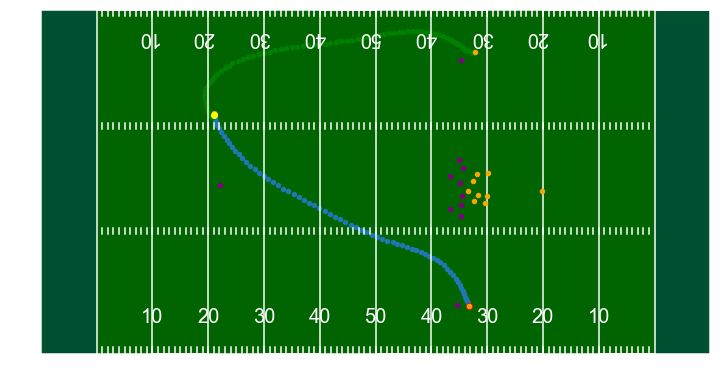

Season 2017 - Gamekey 357 - Playid 3630


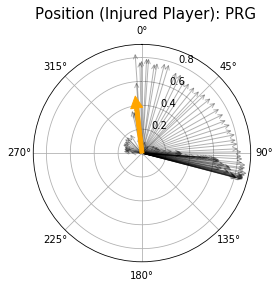

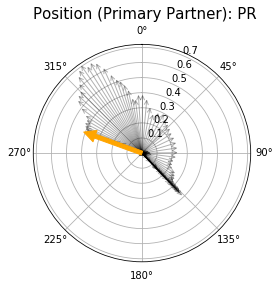

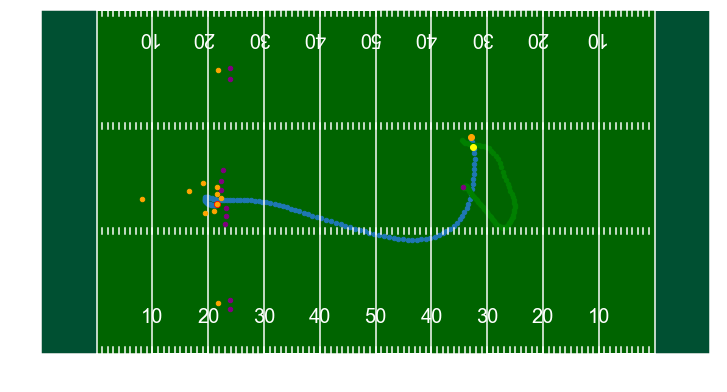

Season 2017 - Gamekey 364 - Playid 2489


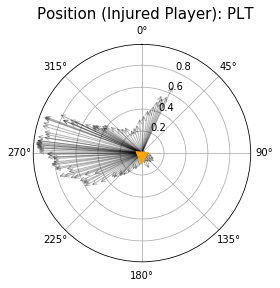

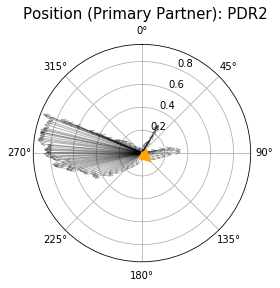

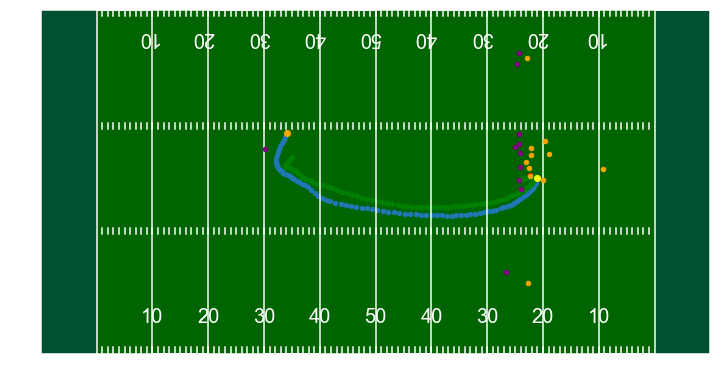

Season 2017 - Gamekey 364 - Playid 2764


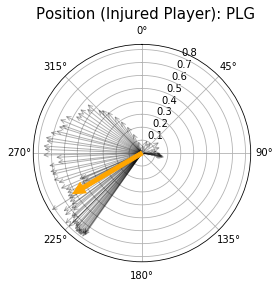

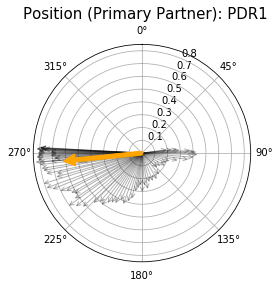

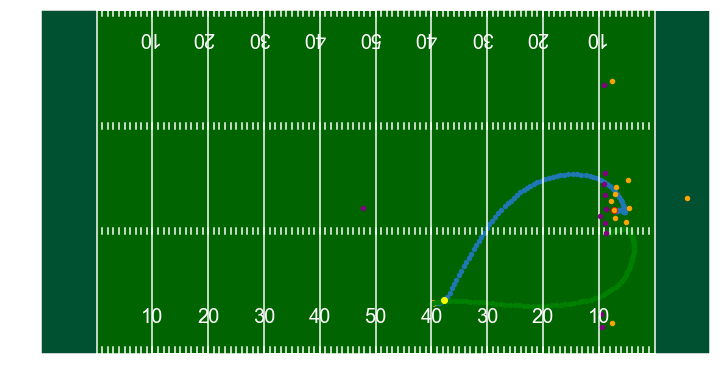

Season 2017 - Gamekey 384 - Playid 183


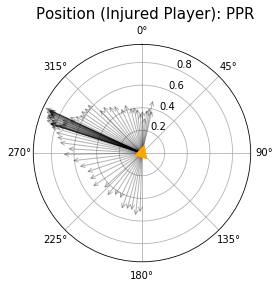

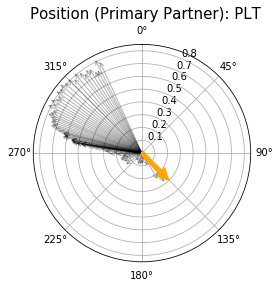

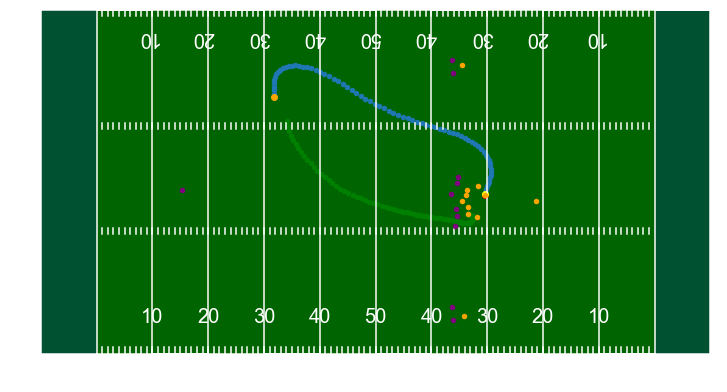

Season 2017 - Gamekey 392 - Playid 1088


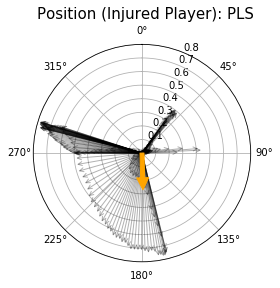

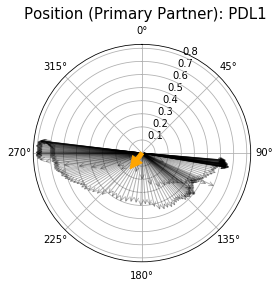

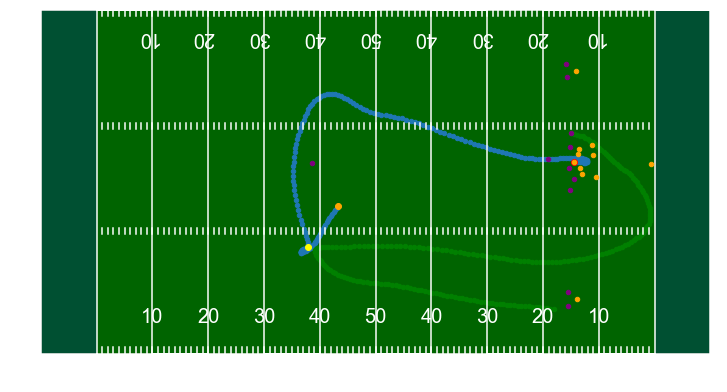

Season 2017 - Gamekey 397 - Playid 1526


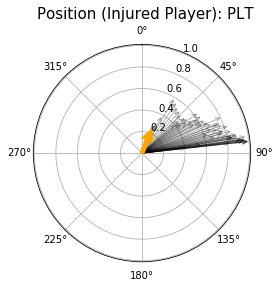

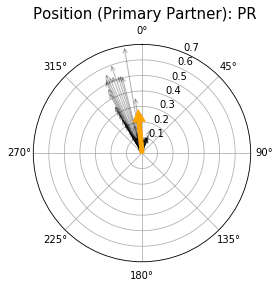

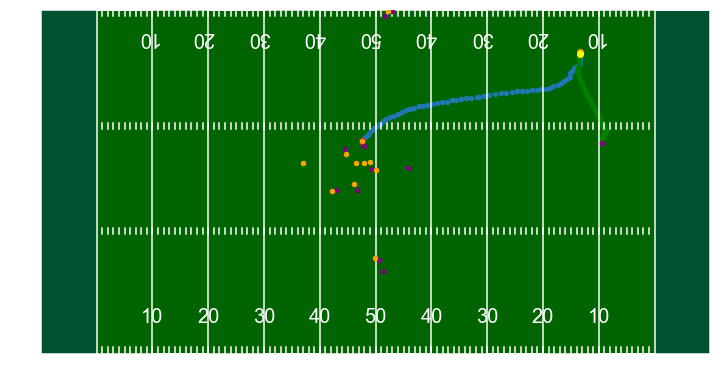

Season 2017 - Gamekey 399 - Playid 3312


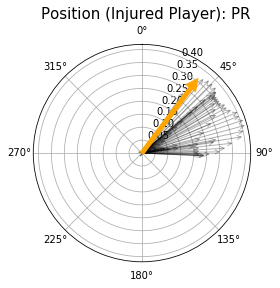

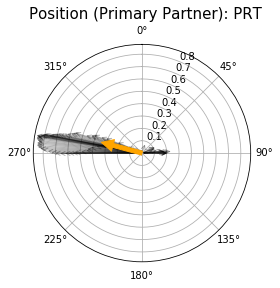

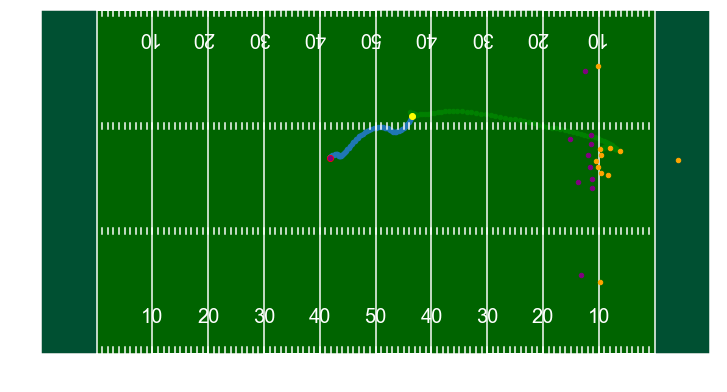

Season 2017 - Gamekey 414 - Playid 1262


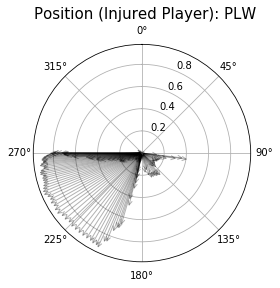

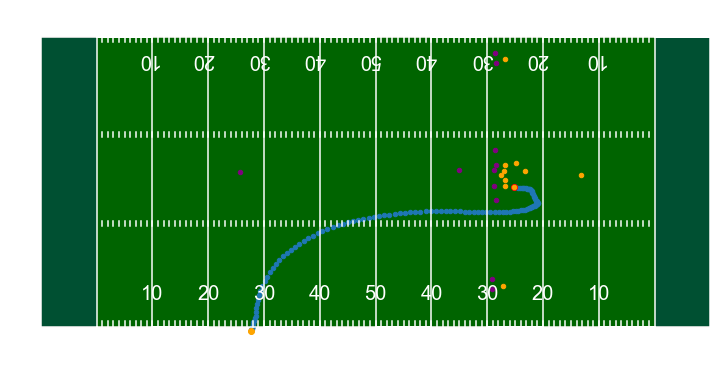

Season 2017 - Gamekey 448 - Playid 2792


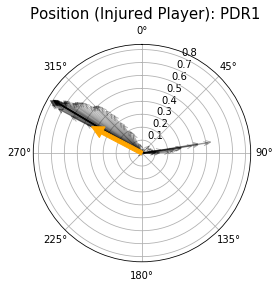

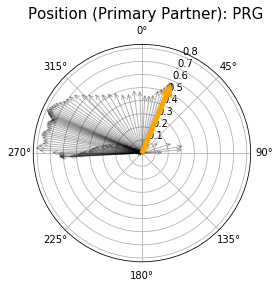

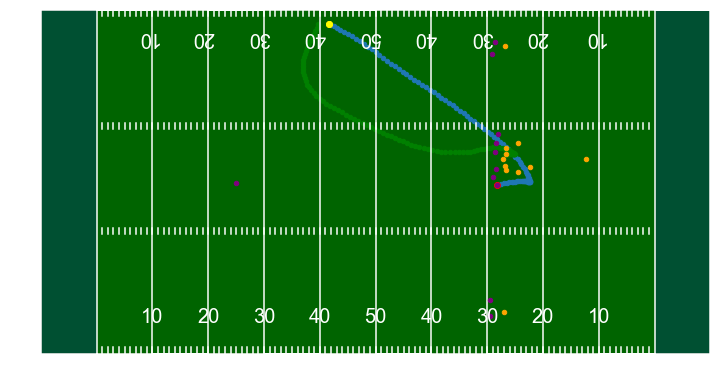

Season 2017 - Gamekey 473 - Playid 2072


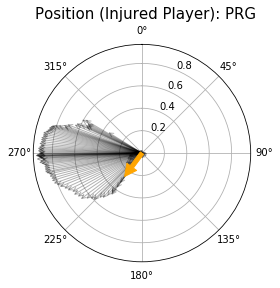

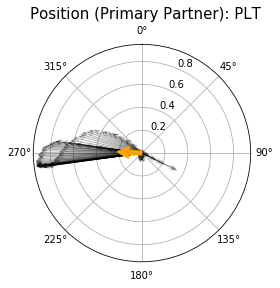

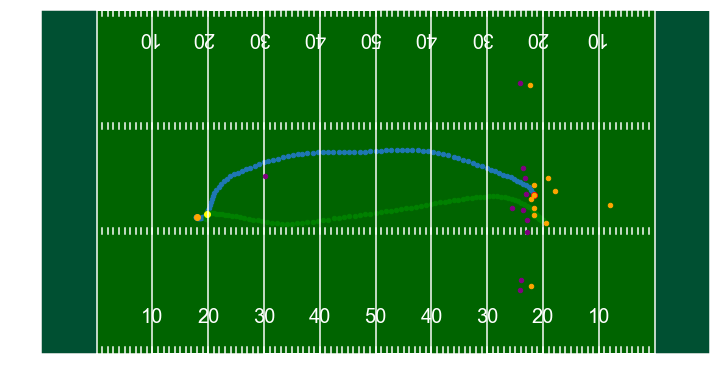

Season 2017 - Gamekey 506 - Playid 1988


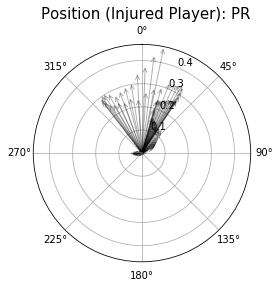

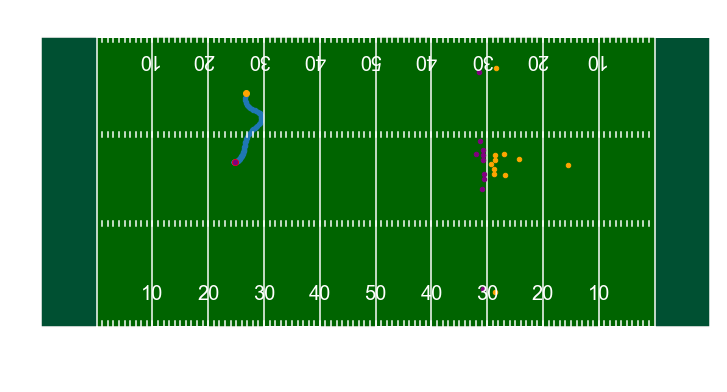

Season 2017 - Gamekey 553 - Playid 1683


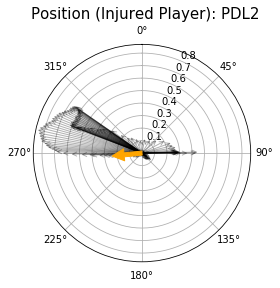

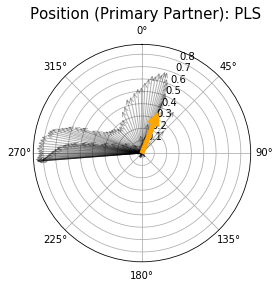

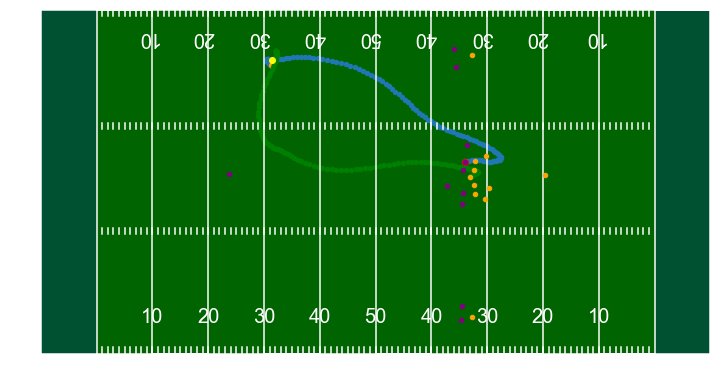

Season 2017 - Gamekey 567 - Playid 1407


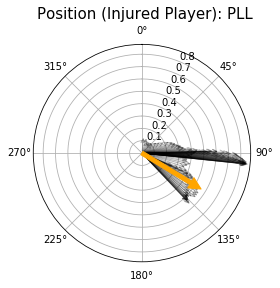

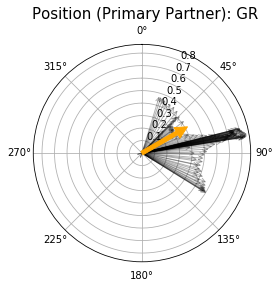

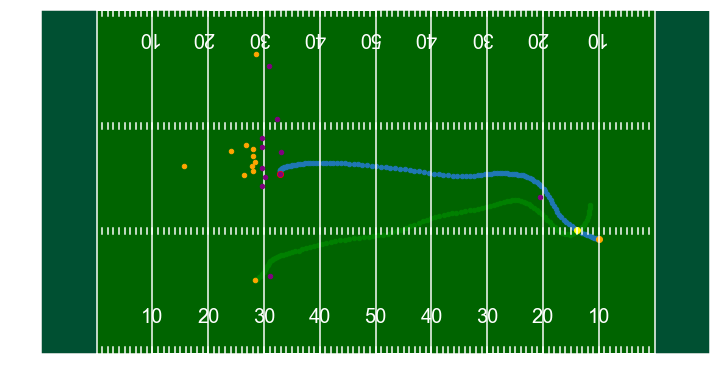

Season 2017 - Gamekey 585 - Playid 2208


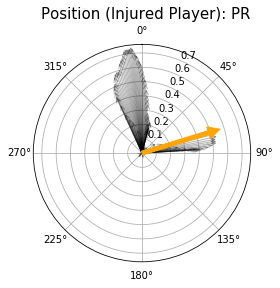

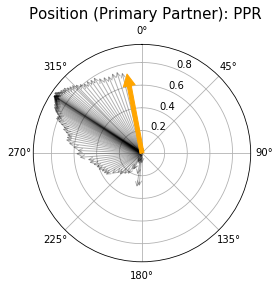

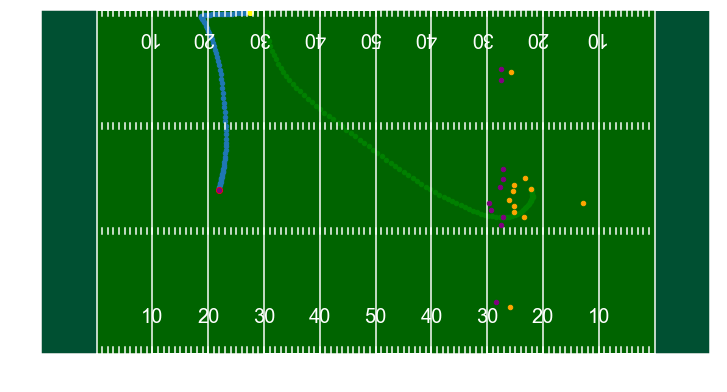

Season 2017 - Gamekey 585 - Playid 733


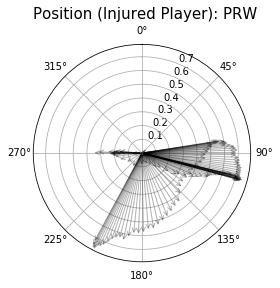

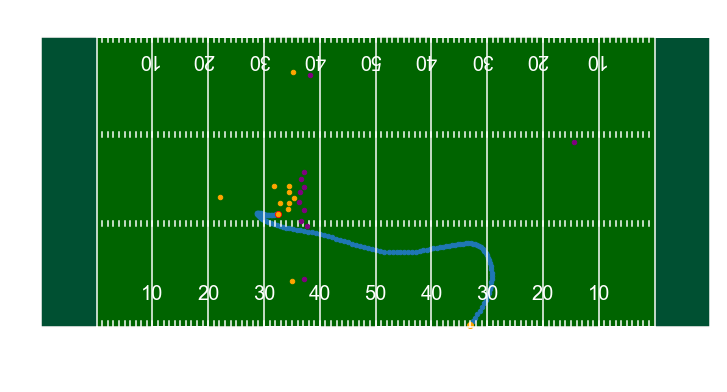

Season 2017 - Gamekey 601 - Playid 602


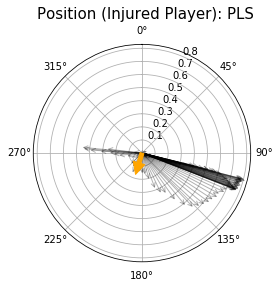

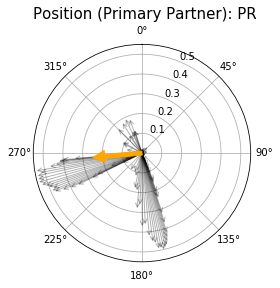

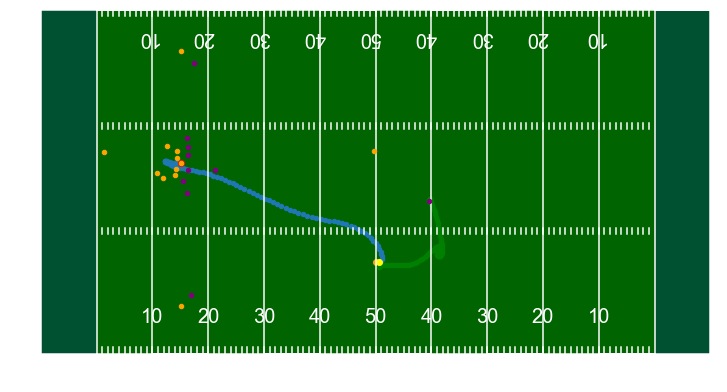

Season 2017 - Gamekey 607 - Playid 978


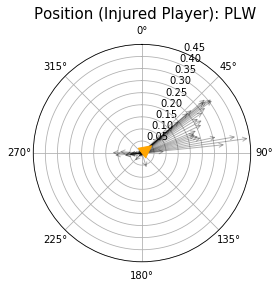

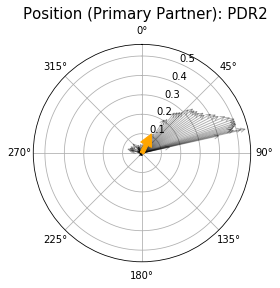

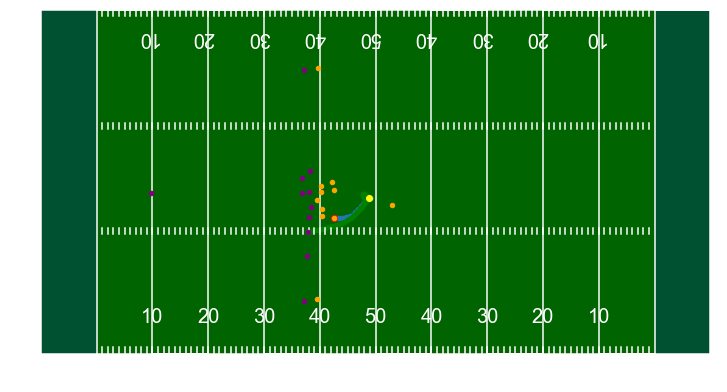

Season 2017 - Gamekey 618 - Playid 2792


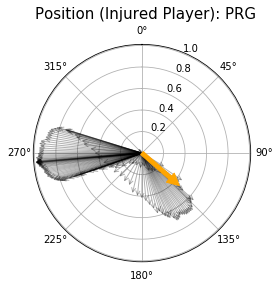

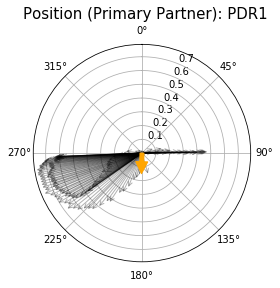

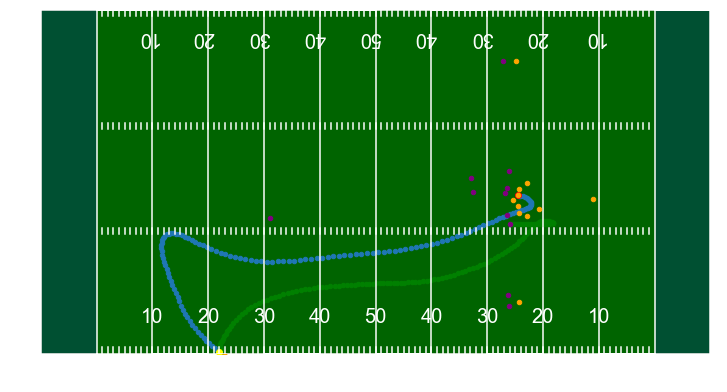

In [168]:
for play_info in vr.iterrows():
    gamekey = play_info[1]['GameKey']
    season_year = play_info[1]['Season_Year']
    playid = play_info[1]['PlayID']
    print('Season {} - Gamekey {} - Playid {}'.format(season_year, gamekey, playid))
    play = pd.read_csv('../working/playlevel/during_play/{}-{}-{}.csv'.format(season_year, gamekey, playid))
    play['dir_theta'] = play['dir'] * np.pi / 180

    # Determine time of injury
    injured = play.loc[play['injured_player']]
    primarypartner = play.loc[play['primary_partner_player']]

    if len(primarypartner) != 0:
        inj_and_pp = pd.merge(injured[['time','x','y']], primarypartner[['time','x','y']], on='time', suffixes=('_inj','_pp'))
        inj_and_pp['dis_from_eachother'] = np.sqrt(np.square(inj_and_pp['x_inj'] -
                                                             inj_and_pp['x_pp']) +
                                                   np.square(inj_and_pp['y_inj'] - 
                                                             inj_and_pp['y_pp']))
        injury_time = inj_and_pp.sort_values('dis_from_eachother')['time'].values[0]

    # Plot injured player compass
    d = play.loc[play['injured_player']]
    role = d.role.values[0]
    fig, ax1 = compass(d['dir_theta'], d['dis'], arrowprops={'alpha':0.3})
    ax1.set_theta_zero_location("N")
    ax1.set_theta_direction(-1)
    # Color point of time when inujury happened
    if len(primarypartner) != 0:
        theta_at_inj = d.loc[d['time'] == injury_time]['dir_theta'].values[0]
        dis_at_inj = d.loc[d['time'] == injury_time]['dis'].values[0]
        ax1.annotate("", xy=(theta_at_inj,dis_at_inj), xytext=(0, 0), arrowprops={'color': 'orange'}) #use cir mean
    plt.suptitle('Position (Injured Player): {}'.format(role), x=0.52, y=1.01, fontsize=15)

    if len(primarypartner) != 0:
        # Plot primary partner compass
        d = play.loc[play['primary_partner_player']]
        role = d.role.values[0]
        fig, ax2 = compass(d['dir_theta'], d['dis'], arrowprops={'alpha':0.3})
        ax2.set_theta_zero_location("N")
        ax2.set_theta_direction(-1)
        # Color point of time when inujury happened
        theta_at_inj = d.loc[d['time'] == injury_time]['dir_theta'].values[0]
        dis_at_inj = d.loc[d['time'] == injury_time]['dis'].values[0]
        ax2.annotate("", xy=(theta_at_inj,dis_at_inj), xytext=(0, 0), arrowprops={'color': 'orange'}) #use cir mean
        plt.suptitle('Position (Primary Partner): {}'.format(role), x=0.52, y=1.01, fontsize=15)
        plt.show()

    #### PLOT
    fig, ax3 = create_football_field()
    # Plot path
    d = play.loc[play['injured_player']]
    d.plot('x', 'y', kind='scatter', ax=ax3,  zorder=2) #Plot injured player path
    play.loc[(play['punting_returning_team'] == 'Returning_Team') &
             (play['event'] == 'ball_snap')].plot('x', 'y', alpha=1, kind='scatter',
                                                  color='purple', ax=ax3, zorder=3, style='+')
    play.loc[(play['punting_returning_team'] == 'Punting_Team')  &
             (play['event'] == 'ball_snap')].plot('x', 'y', alpha=1, kind='scatter',
                                                  color='orange', ax=ax3, zorder=3, style='+')
    start_pos = d.loc[d['time'] == d['time'].min()]
    ax3.scatter(start_pos['x'], start_pos['y'], color='red',  zorder=2)
    end_pos = d.loc[d['time'] == d['time'].max()]
    ax3.scatter(end_pos['x'], end_pos['y'], color='orange',  zorder=2)
    inj_pos = d.loc[d['time'] == injury_time]
    if len(primarypartner) != 0:
        play.loc[play['primary_partner_player']].plot('x', 'y', kind='scatter',
                                                      xlim = (0, 120), ylim=(0,53.3),
                                                      ax=ax3, color='green', zorder=2)
        ax3.scatter(inj_pos['x'], inj_pos['y'], color='yellow',  zorder=2)

    plt.show()

# TODO - find "Dangerous moments" When players are close to eachother and moving at high speed.

In [61]:
inj_and_pp['mph_inj'].dtypes

dtype('float64')

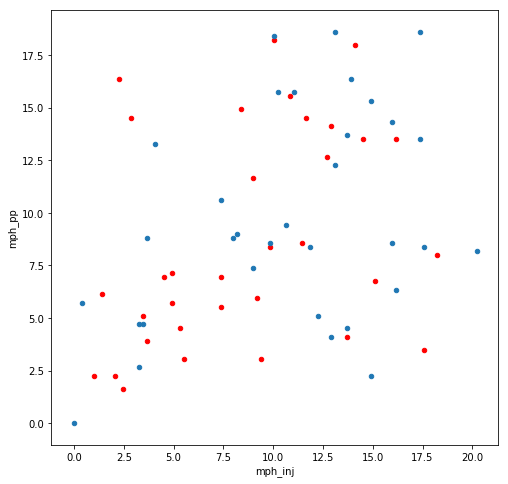

In [118]:
first = True
for play_info in vr.iterrows():
    gamekey = play_info[1]['GameKey']
    season_year = play_info[1]['Season_Year']
    playid = play_info[1]['PlayID']
    play = pd.read_csv('../working/playlevel/during_play/{}-{}-{}.csv'.format(season_year, gamekey, playid))
    play['time'] = pd.to_datetime(play['time'])
    play['dir_theta'] = play['dir'] * np.pi / 180

    # Determine time of injury
    injured = play.loc[play['injured_player']]
    primarypartner = play.loc[play['primary_partner_player']]

    if len(primarypartner) != 0:
        inj_and_pp = pd.merge(injured[['time','x','y','dis','o','dir','mph']],
                      primarypartner[['time','x','y','dis','o','dir','mph']],
                      on='time',
                      suffixes=('_inj','_pp'))
        inj_and_pp['dis_from_eachother'] = \
            np.sqrt(np.square(inj_and_pp['x_inj'] - inj_and_pp['x_pp']) +
                    np.square(inj_and_pp['y_inj'] - inj_and_pp['y_pp']))
        injury_time = inj_and_pp.sort_values('dis_from_eachother')['time'].values[0]
        prior_to_impact = pd.to_datetime(inj_and_pp.sort_values('dis_from_eachother')['time'].values[0]) + dt.timedelta(seconds=-0.3)
        
        if first:
            ax = inj_and_pp.loc[inj_and_pp['time'] == prior_to_impact].plot(x='mph_inj',
                                                                            y='mph_pp',
                                                                            kind='scatter',
                                                                            figsize=(8, 8))
            inj_and_pp.loc[inj_and_pp['time'] == injury_time].plot(x='mph_inj',
                                                                            y='mph_pp',
                                                                            kind='scatter',
                                                                            figsize=(8, 8),
                                                                            color='red', ax=ax)
            first = False
        else:
            inj_and_pp.loc[inj_and_pp['time'] == prior_to_impact].plot(x='mph_inj',
                                                                       y='mph_pp',
                                                                       kind='scatter',
                                                                       ax=ax)
            inj_and_pp.loc[inj_and_pp['time'] == injury_time].plot(x='mph_inj',
                                                                y='mph_pp',
                                                                kind='scatter',
                                                                figsize=(8, 8),
                                                                color='red', ax=ax)

In [148]:
play_pivoted = play.pivot(index='time', columns='role', values=['x', 'y', 'mph','dis','dir'])
play_pivoted.columns = [col[1]+'_'+col[0] for col in play_pivoted.columns.values]

In [155]:
play_pivoted[np.sort(play_pivoted.columns.values)].to_csv('play_pivoted.csv')

In [159]:
play_pivoted.head()

GL_x       GR_x        P_x     PDL1_x  \
time                                                                  
2016-08-12 02:07:37.000  79.580002  80.209999  91.809998  78.180000   
2016-08-12 02:07:37.100  79.620003  80.180000  91.800003  78.260002   
2016-08-12 02:07:37.200  79.699997  80.160004  91.809998  78.459999   
2016-08-12 02:07:37.300  79.760002  80.120003  91.809998  78.720001   
2016-08-12 02:07:37.400  79.800003  79.989998  91.790001  79.029999   

                            PDL2_x     PDR1_x     PDR2_x     PDR3_x  \
time                                                                  
2016-08-12 02:07:37.000  78.010002  78.459999  79.559998  78.470001   
2016-08-12 02:07:37.100  78.029999  78.470001  79.610001  78.470001   
2016-08-12 02:07:37.200  78.040001  78.559998  79.639999  78.480003   
2016-08-12 02:07:37.300  78.070000  78.660004  79.680000  78.430000   
2016-08-12 02:07:37.400  78.209999  78.930000  79.709999  78.410004   

                             PFB_x      PLG_x      PLM_x      PLS_x  \
time                                                                  
2016-08-12 02:07:37.000  38.360001  80.690002  77.519997  79.589996   
2016-08-12 02:07:37.100  38.470001  80.709999  77.519997  79.739998   
2016-08-12 02:07:37.200  38.580002  80.739998  77.529999  79.860001   
2016-08-12 02:07:37.300  38.680000  80.769997  77.570000  79.879997   
2016-08-12 02:07:37.400  38.790001  80.879997  77.639999  80.029999   

                             PLT_x      PLW_x      PPL_x   PR_x      PRG_x  \
time                                                                         
2016-08-12 02:07:37.000  80.529999  82.660004  83.400002  29.67  80.360001   
2016-08-12 02:07:37.100  80.650002  82.720001  83.379997  29.66  80.430000   
2016-08-12 02:07:37.200  80.790001  82.790001  83.339996  29.66  80.540001   
2016-08-12 02:07:37.300  80.940002  82.800003  83.309998  29.67  80.639999   
2016-08-12 02:07:37.400  81.120003  82.839996  83.290001  29.68  80.760002   

                             PRT_x      PRW_x       VL_x      VRi_x  \
time                                                                  
2016-08-12 02:07:37.000  80.080002  82.540001  77.930000  77.989998   
2016-08-12 02:07:37.100  80.580002  82.550003  77.959999  77.989998   
2016-08-12 02:07:37.200  80.739998  82.589996  77.940002  77.989998   
2016-08-12 02:07:37.300  80.690002  82.610001  77.910004  77.980003   
2016-08-12 02:07:37.400  80.779999  82.620003  77.870003  77.949997   

                             VRo_x  GL_y       GR_y        P_y     ...      \
time                                                               ...       
2016-08-12 02:07:37.000  77.660004  6.20  43.540001  27.260000     ...       
2016-08-12 02:07:37.100  77.669998  6.17  43.540001  27.240000     ...       
2016-08-12 02:07:37.200  77.669998  6.14  43.560001  27.219999     ...       
2016-08-12 02:07:37.300  77.680000  6.08  43.580002  27.219999     ...       
2016-08-12 02:07:37.400  77.669998  5.96  43.610001  27.230000     ...       

                         VL_dis  VRi_dis  VRo_dis      GL_dir      GR_dir  \
time                                                                        
2016-08-12 02:07:37.000    0.03     0.02     0.02  189.190002  263.940002   
2016-08-12 02:07:37.100    0.03     0.01     0.01  192.330002  258.750000   
2016-08-12 02:07:37.200    0.04     0.00     0.03  194.270004  255.360001   
2016-08-12 02:07:37.300    0.03     0.02     0.05  196.169998  251.740005   
2016-08-12 02:07:37.400    0.05     0.06     0.06  198.250000  248.190002   

                              P_dir    PDL1_dir   PDL2_dir    PDR1_dir  \
time                                                                     
2016-08-12 02:07:37.000  281.619995  116.610001  72.139999  102.790001   
2016-08-12 02:07:37.100  279.609985  117.500000  72.620003  102.510002   
2016-08-12 02:07:37.200  278.390015  118.489998  73.459999  101.839996   
2016-08-12 02:07:37.300  276.75000

In [49]:
pd.to_datetime(inj_and_pp.sort_values('dis_from_eachother')['time'].values[0])

Timestamp('2017-12-17 23:13:35.800000')

In [53]:
prior_to_impact = pd.to_datetime(inj_and_pp.sort_values('dis_from_eachother')['time'].values[0]) + dt.timedelta(seconds=-0.1)

In [24]:
injured_player_at_inj_time = play.loc[(play['time'] == injury_time) & play['injured_player']]
primary_partner_at_inj_time = play.loc[(play['time'] == injury_time) & play['primary_partner_player']]

In [25]:
primary_partner_at_inj_time

Unnamed: 0  season_year  gamekey  playid  gsisid  \
3075       10178         2017      618    2792   32677   

                         time          x     y   dis          o         dir  \
3075  2017-12-17 23:13:35.800  32.139999  0.78  0.15  95.660004  181.479996   

     event number position  role   generalized_role punting_returning_team  \
3075   NaN     58      ILB  PDR1  Defensive_Lineman         Returning_Team   

      gsisid_injured player_activity_derived turnover_related  \
3075           31950                Tackling               No   

     primary_impact_type  primary_partner_gsisid  \
3075      Helmet-to-body                 32677.0   

     primary_partner_activity_derived friendly_fire                ball_snap  \
3075                         Blocking            No  2017-12-17 23:13:22.000   

                first_contact                 line_set  \
3075  2017-12-17 23:13:34.600  2017-12-17 23:13:18.900   

                out_of_bounds              play_submit  \
3075  2017-12-17 23:13:36.100  2017-12-17 23:13:41.700   

                         punt                punt_play  \
3075  2017-12-17 23:13:24.300  2017-12-17 23:12:58.600   

                punt_received       mph  injured_player  \
3075  2017-12-17 23:13:28.600  3.068182           False   

      primary_partner_player  left_to_right  dir_theta  
3075                    True          False   3.167423

In [35]:
ax = inj_and_pp.sort_values('dis_from_eachother').head(5).plot(x='mph_inj', y='mph_pp', kind='scatter', ax=ax)

# Example play "Danger Moment"
Season 2016 - Gamekey 296 - Playid 2667

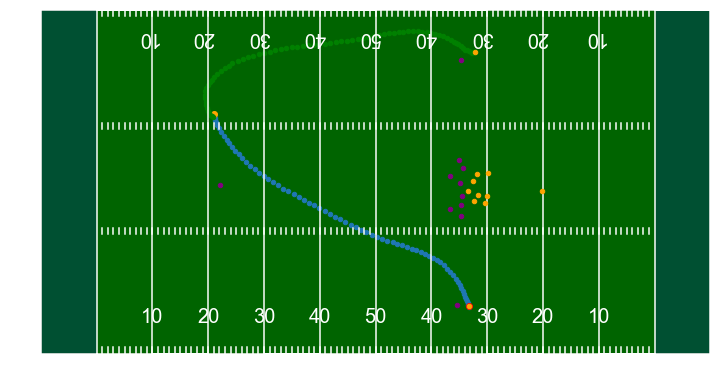

In [169]:
season_year = 2016
gamekey = 296
playid = 2667
play = pd.read_csv('../working/playlevel/during_play/{}-{}-{}.csv'.format(season_year, gamekey, playid))
play['dir_theta'] = play['dir'] * np.pi / 180

#### PLOT
fig, ax3 = create_football_field()
# Plot path
d = play.loc[play['injured_player']]
d.plot('x', 'y', kind='scatter', ax=ax3,  zorder=2) #Plot injured player path
play.loc[(play['punting_returning_team'] == 'Returning_Team') &
         (play['event'] == 'ball_snap')].plot('x', 'y', alpha=1, kind='scatter',
                                              color='purple', ax=ax3, zorder=3, style='+')
play.loc[(play['punting_returning_team'] == 'Punting_Team')  &
         (play['event'] == 'ball_snap')].plot('x', 'y', alpha=1, kind='scatter',
                                              color='orange', ax=ax3, zorder=3, style='+')
start_pos = d.loc[d['time'] == d['time'].min()]
ax3.scatter(start_pos['x'], start_pos['y'], color='red',  zorder=2)
end_pos = d.loc[d['time'] == d['time'].max()]
ax3.scatter(end_pos['x'], end_pos['y'], color='orange',  zorder=2)
inj_pos = d.loc[d['time'] == injury_time]
if len(primarypartner) != 0:
    play.loc[play['primary_partner_player']].plot('x', 'y', kind='scatter',
                                                  xlim = (0, 120), ylim=(0,53.3),
                                                  ax=ax3, color='green', zorder=2)
    ax3.scatter(inj_pos['x'], inj_pos['y'], color='yellow',  zorder=2)

plt.show()

In [170]:
play_pivoted = play.pivot(index='time', columns='role', values=['x', 'y', 'mph','dis','dir'])
play_pivoted.columns = [col[1]+'_'+col[0] for col in play_pivoted.columns.values]
play_pivoted[np.sort(play_pivoted.columns.values)].to_csv('play_pivoted.csv')